## 数据可视化详解

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'].insert(0, 'SimHei')
plt.rcParams['axes.unicode_minus'] = False
get_ipython().run_line_magic('config', "InlineBackend.figure_format = 'svg'")

In [2]:
import warnings

warnings.filterwarnings('ignore')

### matplotlib

整体架构：
1. 渲染层 - 底层的画布，图像的渲染，事件交互
2. 组件层 - 各种各样的统计图表
3. 脚本层 - 提供编程接口，通过调函数实现图表绘制

绘图过程：
1. 创建画布 - plt.figure(figsize, dpi) --> Figure
2. 创建坐标系 - plt.subplot(nrows, ncols, index)
3. 绘制图表
   - 折线图：plt.plot()
   - 散点图：plt.scatter()
   - 柱状图：plt.bar() / plt.barh()
   - 饼图：plt.pie()
   - 直方图：plt.hist()
   - 箱线图：plt.boxplot()
4. 保存图表 - plt.savefig()
5. 显示图表 - plt.show()

In [3]:
x = np.linspace(-2 * np.pi, 2 * np.pi, 120)
y1 = np.sin(x)
y2 = np.cos(x)

In [4]:
# %pip install PyQt5
# %pip install PyQt6

In [5]:
# 魔法指令 - 将统计图表渲染到Qt窗口
# %matplotlib qt

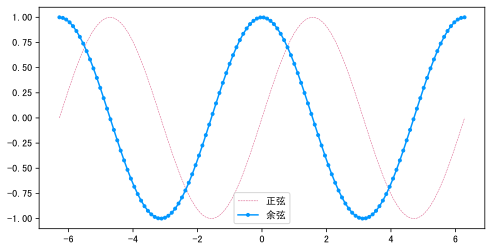

In [6]:
plt.figure(figsize=(8, 4), dpi=200)
plt.subplot(1, 1, 1)
plt.plot(x, y1, label='正弦', linewidth=0.5, linestyle='--', color='#D75281')
plt.plot(x, y2, label='余弦', marker='.', color='#0096FF')
plt.legend(loc='lower center')
# plt.savefig('aa.jpg')
plt.show()

In [7]:
# 魔法指令 - 将统计图表渲染到浏览器
%matplotlib inline

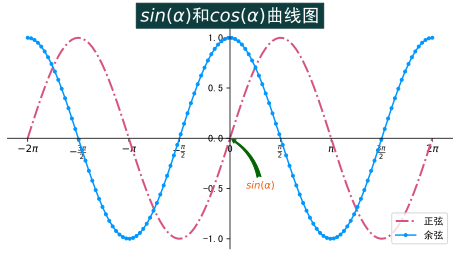

In [8]:
# 创建画布（Figure）
plt.figure(figsize=(8, 4), dpi=200)
# 创建坐标系（Axes）
ax = plt.subplot(1, 1, 1)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# 绘制折线图
plt.plot(x, y1, label='正弦', color='#D75281', linewidth=2, linestyle='-.')
plt.plot(x, y2, label='余弦', color='#0096FF', marker='.')
# 定制图表的标题
plt.title(r'$sin(\alpha)$和$cos(\alpha)$曲线图', fontdict=dict(fontsize=18, color='#FFFFFF', backgroundcolor='#0F3D3E'))
# 定制横轴的刻度
plt.xticks(
    np.arange(-2 * np.pi, 2 * np.pi + 0.1, np.pi / 2),
    labels=[r'$ -2\pi $', r'$ -\frac{3\pi}{2} $', r'$ -\pi $', r'$ -\frac{\pi}{2} $', 
            '0', r'$ \frac{\pi}{2} $', r'$ \pi $', r'$ \frac{3\pi}{2} $', r'$ 2\pi $']
)
# 定制纵轴的刻度
plt.yticks(np.arange(-1, 1.5, 0.5))
# 添加标注（文字和箭头）
plt.annotate(r'$ sin(\alpha) $', xytext=(0.5, -0.5), xy=(0, 0), color='#EF5B0C', 
             arrowprops=dict(arrowstyle='fancy', connectionstyle='arc3, rad=0.25', color='darkgreen'))
# 定制图例
plt.legend(loc='lower right')
# 保存图表
# plt.savefig('aa.jpg')
# 显示图表
plt.show()

In [9]:
x2 = np.linspace(0.1, 10.1, 60)
y3 = np.log2(x2)

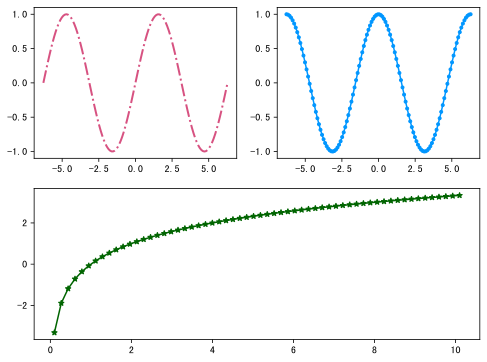

In [10]:
# 创建画布（Figure）
plt.figure(figsize=(8, 6), dpi=200)
# 创建坐标系（Axes）
plt.subplot(2, 2, 1)
# 绘制折线图
plt.plot(x, y1, label='正弦', color='#D75281', linewidth=2, linestyle='-.')
# 创建坐标系
plt.subplot(2, 2, 2)
plt.plot(x, y2, label='余弦', color='#0096FF', marker='.')
# 创建坐标系
# plt.subplot(2, 2, (3, 4))
plt.subplot(2, 1, 2)
# 绘制散点图
plt.plot(x2, y3, color='darkgreen', marker='*')
# 显示图表
plt.show()

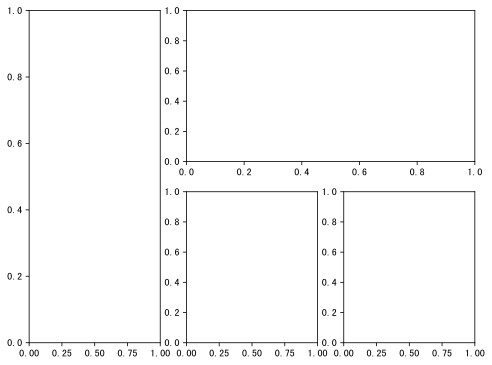

In [11]:
# 创建画布（Figure）
plt.figure(figsize=(8, 6), dpi=200)
# 创建网格对象（GridSpec）
grid = plt.GridSpec(2, 3)
plt.subplot(grid[:, 0])
plt.subplot(grid[0, 1:])
plt.subplot(grid[1, 1])
plt.subplot(grid[1, 2])
plt.show()

In [12]:
# 月收入
income = np.fromstring('5550, 7500, 10500, 15000, 20000, 25000, 30000, 40000', sep=',')
income

array([ 5550.,  7500., 10500., 15000., 20000., 25000., 30000., 40000.])

In [13]:
# 月网购支出
outcome = np.fromstring('800, 1800, 1250, 2000, 1800, 2100, 2500, 3500', sep=',')
outcome

array([ 800., 1800., 1250., 2000., 1800., 2100., 2500., 3500.])

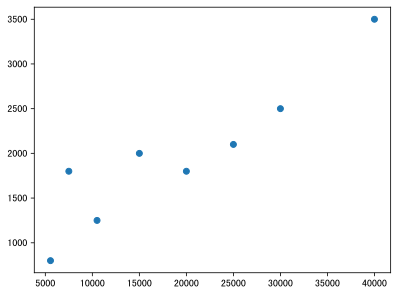

In [14]:
plt.scatter(income, outcome)
plt.show()

In [15]:
# 网购次数
nums = np.array([5, 3, 10, 5, 12, 20, 8, 10])
nums

array([ 5,  3, 10,  5, 12, 20,  8, 10])

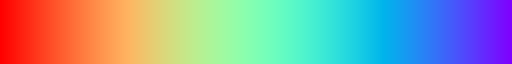

In [16]:
plt.get_cmap('rainbow_r')

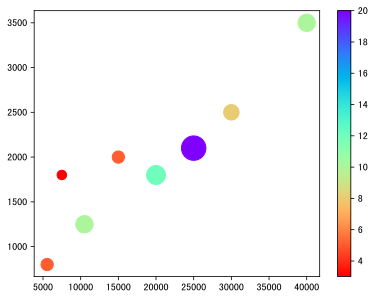

In [17]:
# 绘制散点图 ---> 气泡图（引入第三个变量）
plt.scatter(income, outcome, s=nums * 30, c=nums, cmap='rainbow_r')
plt.colorbar()

In [18]:
data1 = np.random.randint(100, 500, 4)
data2 = np.random.randint(200, 600, 4)
data3 = np.random.randint(300, 500, 4)
quarter = np.arange(4)

In [19]:
errs = np.random.randint(10, 30, 4)

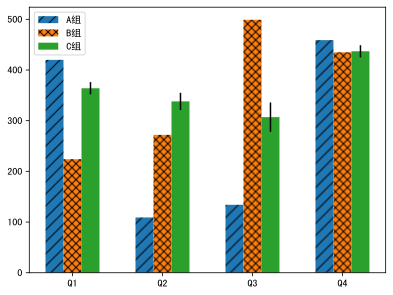

In [20]:
# 柱状图
plt.bar(quarter-0.2, data1, label='A组', hatch='//', width=0.2)
plt.bar(quarter, data2, label='B组', hatch='xxx', width=0.2)
plt.bar(quarter+0.2, data3, label='C组', width=0.2, yerr=errs)
plt.xticks(quarter, labels=[f'Q{i}' for i in range(1, 5)])
plt.legend()
plt.show()

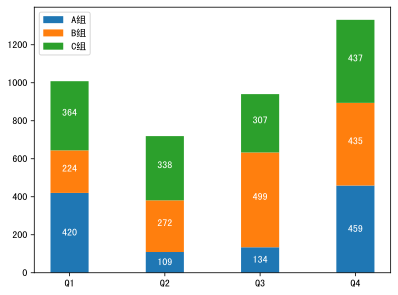

In [21]:
# 堆叠柱状图
plt.bar(quarter, data1, label='A组', width=0.4)
plt.bar(quarter, data2, label='B组', width=0.4, bottom=data1)
plt.bar(quarter, data3, label='C组', width=0.4, bottom=data1 + data2)
plt.xticks(quarter, labels=[f'Q{i}' for i in range(1, 5)])
for i in range(quarter.size):
    plt.text(i, data1[i] // 2, data1[i], ha='center', va='center', color='w')
    plt.text(i, data1[i] + data2[i] // 2, data2[i], ha='center', color='w')
    plt.text(i, data1[i] + data2[i] + data3[i] // 2, data3[i], ha='center', color='w')
plt.legend()
plt.show()

In [22]:
# 计算每组数据的占比
temp_df = pd.DataFrame(data={
    'A组': data1,
    'B组': data2,
    'C组': data3,
})
temp_df

,A组,B组,C组
0,420,224,364
1,109,272,338
2,134,499,307
3,459,435,437


In [23]:
pct_data = temp_df.apply(lambda x: x / temp_df.sum(axis=1))
pct_data

,A组,B组,C组
0,0.416667,0.222222,0.361111
1,0.151599,0.378303,0.470097
2,0.142553,0.530851,0.326596
3,0.344853,0.326822,0.328325


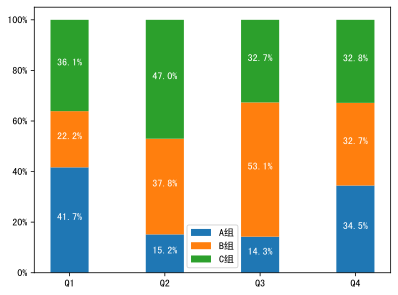

In [24]:
import matplotlib.ticker as tkr

# 绘制百分比堆叠柱状图
data1, data2, data3 = pct_data.A组, pct_data.B组, pct_data.C组
plt.bar(quarter, data1, label='A组', width=0.4)
plt.bar(quarter, data2, label='B组', width=0.4, bottom=data1)
plt.bar(quarter, data3, label='C组', width=0.4, bottom=data1 + data2)
plt.xticks(quarter, labels=[f'Q{i}' for i in range(1, 5)])
# plt.yticks(np.arange(0, 1.1, 0.2), labels=[f'{i}%' for i in range(0, 101, 20)])
plt.gca().yaxis.set_major_formatter(tkr.PercentFormatter(xmax=1, decimals=0))
for i in range(quarter.size):
    plt.text(i, data1[i] / 2, f'{data1[i] * 100:.1f}%', ha='center', color='w')
    plt.text(i, data1[i] + data2[i] / 2, f'{data2[i] * 100:.1f}%', ha='center', color='w')
    plt.text(i, data1[i] + data2[i] + data3[i] / 2, f'{data3[i] * 100:.1f}%', ha='center', color='w')
plt.legend()
plt.show()

In [25]:
labels = ['苹果', '香蕉', '桃子', '荔枝', '石榴', '山竹', '榴莲']
data = np.random.randint(100, 500, 7)

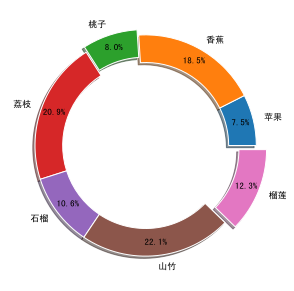

In [26]:
# 绘制饼图
plt.figure(figsize=(5, 5), dpi=120)
plt.pie(
    data, 
    labels=labels,  # 每块饼对应的标签
    labeldistance=1.1,  # 标签到圆心的距离
    autopct='%.1f%%',  # 自动计算和显示百分比
    pctdistance=0.88,  # 百分比到圆心的距离
    explode=[0, 0, 0.05, 0, 0, 0, 0.1],  # 分离距离（分离饼图）
    shadow=True,  # 阴影效果
    wedgeprops={'width': 0.25, 'edgecolor': 'w'},  # 楔子属性（环状饼图）
    textprops={'fontsize': 9, 'color': 'k'}  # 文本属性
)
plt.show()

In [27]:
x1 = np.random.normal(0, 1, 5000)
x2 = np.random.random(100000)

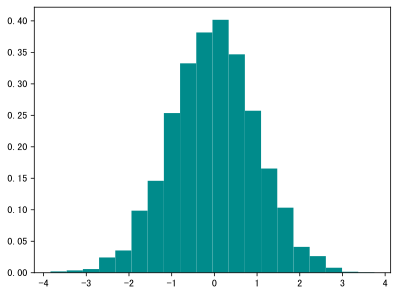

In [28]:
# 绘制直方图（概率密度）
plt.hist(x1, bins=20, density=True, color='darkcyan')
plt.show()

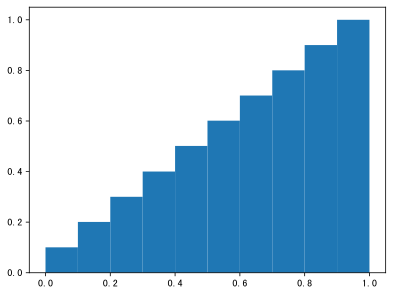

In [29]:
# 绘制直方图（累积分布）
plt.hist(x2, bins=10, density=True, cumulative=True)
plt.show()

In [30]:
data = x1[::5]
data.size

1000

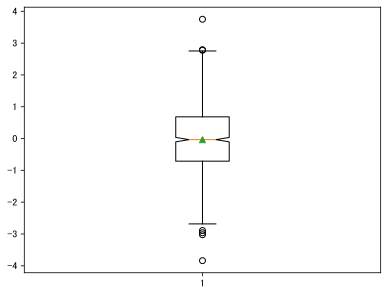

In [31]:
# 绘制箱线图
plt.boxplot(data, showmeans=True, notch=True)
plt.show()

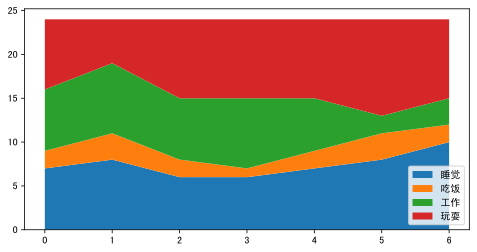

In [32]:
# 堆叠折线图（面积图）
plt.figure(figsize=(8, 4))
days = np.arange(7)
sleeping = [7, 8, 6, 6, 7, 8, 10]
eating = [2, 3, 2, 1, 2, 3, 2]
working = [7, 8, 7, 8, 6, 2, 3]
playing = [8, 5, 9, 9, 9, 11, 9]
plt.stackplot(days, sleeping, eating, working, playing)
plt.legend(['睡觉', '吃饭', '工作', '玩耍'], fontsize=10)
plt.show()

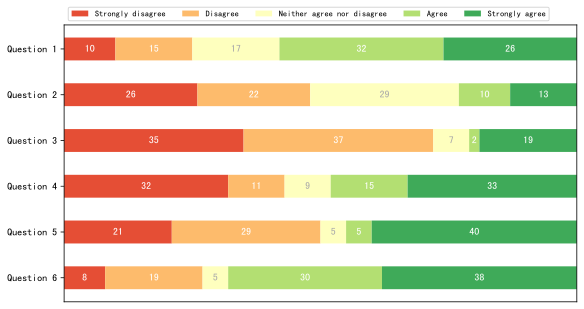

In [33]:
import matplotlib.pyplot as plt
import numpy as np

category_names = ['Strongly disagree', 'Disagree',
                  'Neither agree nor disagree', 'Agree', 'Strongly agree']
results = {
    'Question 1': [10, 15, 17, 32, 26],
    'Question 2': [26, 22, 29, 10, 13],
    'Question 3': [35, 37, 7, 2, 19],
    'Question 4': [32, 11, 9, 15, 33],
    'Question 5': [21, 29, 5, 5, 40],
    'Question 6': [8, 19, 5, 30, 38]
}


def survey(results, category_names):
    """
    Parameters
    ----------
    results : dict
        A mapping from question labels to a list of answers per category.
        It is assumed all lists contain the same number of entries and that
        it matches the length of *category_names*.
    category_names : list of str
        The category labels.
    """
    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    category_colors = plt.colormaps['RdYlGn'](
        np.linspace(0.15, 0.85, data.shape[1]))

    fig, ax = plt.subplots(figsize=(9.2, 5))
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())

    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        rects = ax.barh(labels, widths, left=starts, height=0.5,
                        label=colname, color=color)

        r, g, b, _ = color
        text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
        ax.bar_label(rects, label_type='center', color=text_color)
    ax.legend(ncols=len(category_names), bbox_to_anchor=(0, 1),
              loc='lower left', fontsize='small')

    return fig, ax


survey(results, category_names)
plt.show()

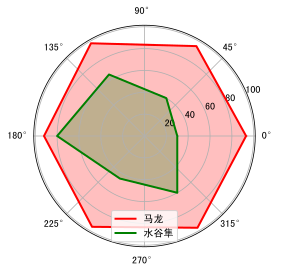

In [34]:
# 雷达图（极坐标折线图）
labels = np.array(['速度', '力量', '经验', '防守', '发球', '技术'])
malong_values = np.array([93, 95, 98, 92, 96, 97])
shuigu_values = np.array([30, 40, 65, 80, 45, 60])
angles = np.linspace(0, 2 * np.pi, labels.size, endpoint=False)
# 加一条数据让图形闭合
malong_values = np.append(malong_values, malong_values[0])
shuigu_values = np.append(shuigu_values, shuigu_values[0])
angles = np.append(angles, angles[0])

# 创建画布
plt.figure(figsize=(4, 4), dpi=120)
# 创建坐标系
ax = plt.subplot(projection='polar')
# 绘图和填充
plt.plot(angles, malong_values, color='r', linewidth=2, label='马龙')
plt.fill(angles, malong_values, color='r', alpha=0.25)
plt.plot(angles, shuigu_values, color='g', linewidth=2, label='水谷隼')
plt.fill(angles, shuigu_values, color='g', alpha=0.25)
# 设置文字和网格线
# ax.set_thetagrids(angles[:-1] * 180 / np.pi, labels, fontsize=10)
# ax.set_rgrids([0, 20, 40, 60, 80, 100], fontsize=10)
ax.legend()
plt.show()

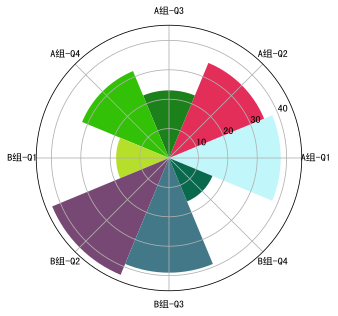

In [35]:
# 玫瑰图（圆形柱状图）
group1 = np.random.randint(20, 50, 4)
group2 = np.random.randint(10, 60, 4)
x = np.array([f'A组-Q{i}' for i in range(1, 5)] + [f'B组-Q{i}' for i in range(1, 5)])
y = np.array(group1.tolist() + group2.tolist())
theta = np.linspace(0, 2 * np.pi, x.size, endpoint=False)
width = 2 * np.pi / x.size

# 产生随机颜色
colors = np.random.rand(8, 3)
# 将柱状图投影到极坐标
ax = plt.subplot(projection='polar')
plt.bar(theta, y, width=width, color=colors, bottom=0)
ax.set_thetagrids(theta * 180 / np.pi, x, fontsize=10)
plt.show()

In [36]:
# %matplotlib qt

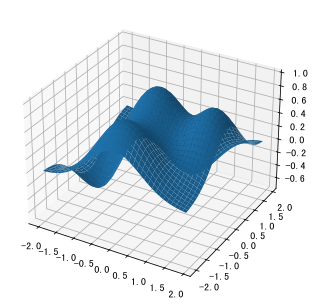

In [37]:
# 绘制3D曲面
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8, 4), dpi=120)
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)
x = np.arange(-2, 2, 0.1)
y = np.arange(-2, 2, 0.1)
x, y = np.meshgrid(x, y)
z = (1 - y ** 5 + x ** 5) * np.exp(-x ** 2 - y ** 2)
ax.plot_surface(x, y, z)
plt.show()

In [38]:
# %matplotlib inline

### seaborn

对matplotlib进行了封装，定制了默认的样式，简化了调用matplotlib函数时需要传入的参数。

In [39]:
# %pip install seaborn

In [40]:
import seaborn as sns

# 设置使用默认主题（样式、配色方案、字体方案、……）
sns.set_theme()
# sns.set_theme(font_scale=1.2, style='darkgrid', palette='Dark2')

plt.rcParams['font.sans-serif'].insert(0, 'SimHei')
plt.rcParams['axes.unicode_minus'] = False

In [41]:
# import ssl

# ssl._create_default_https_context = ssl._create_unverified_context

In [42]:
# tips_df = sns.load_dataset('tips')
# tips_df.info()

In [43]:
tips_df = pd.read_excel('res/tips.xlsx')
tips_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [44]:
tips_df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<Axes: xlabel='total_bill', ylabel='Count'>

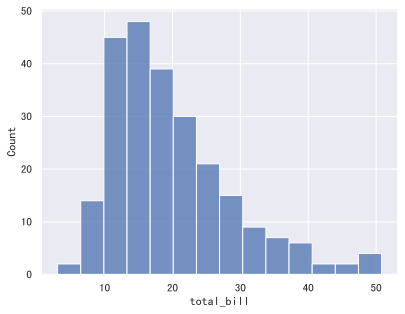

In [45]:
sns.histplot(data=tips_df, x='total_bill')

<Axes: xlabel='total_bill', ylabel='Density'>

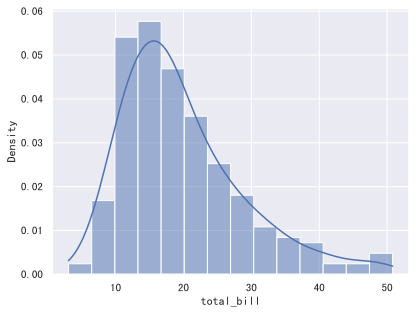

In [46]:
# 绘制直方图
# kde - kernel density estimation - 拟合概率密度曲线
sns.histplot(data=tips_df, x='total_bill', kde=True, stat='density')

In [47]:
# tips_df[['total_bill', 'tip']].corr(method='pearson')

In [48]:
# 绘制点对图
# sns.pairplot(data=tips_df)

In [49]:
# tips_df.query('sex == "Female"')[['total_bill', 'tip']].corr()

In [50]:
# tips_df.query('sex == "Male"')[['total_bill', 'tip']].corr()

In [51]:
sns.color_palette('tab10')

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

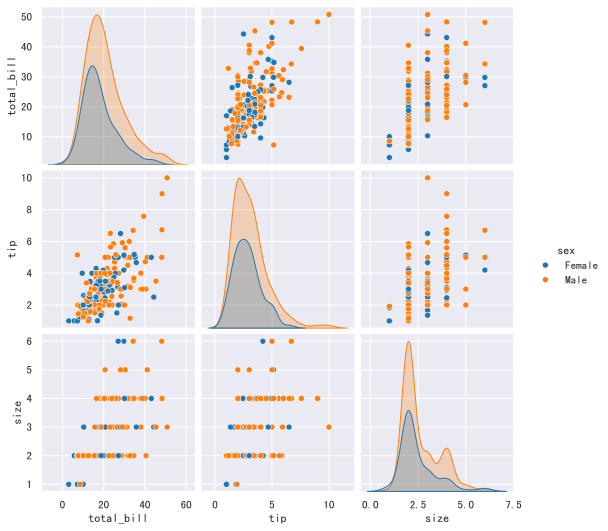

In [52]:
sns.pairplot(data=tips_df, hue='sex', palette='tab10')

In [53]:
sns.color_palette('winter')

[(0.0, 0.1411764705882353, 0.9294117647058824),
 (0.0, 0.28627450980392155, 0.8568627450980393),
 (0.0, 0.42745098039215684, 0.7862745098039216),
 (0.0, 0.5725490196078431, 0.7137254901960784),
 (0.0, 0.7137254901960784, 0.6431372549019607),
 (0.0, 0.8588235294117647, 0.5705882352941176)]

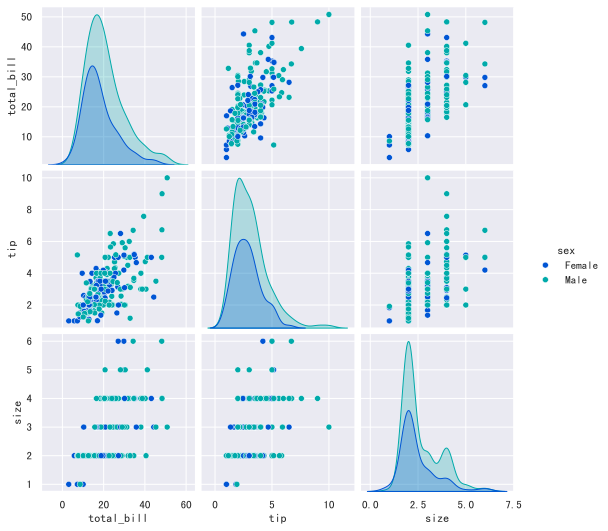

In [54]:
sns.pairplot(data=tips_df, hue='sex', palette='winter')

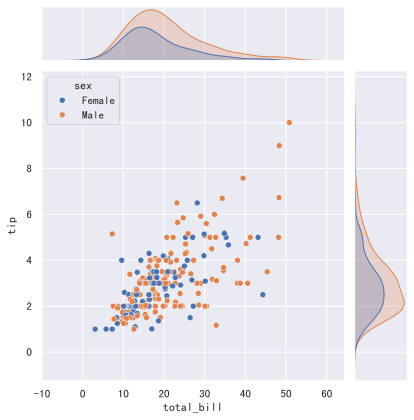

In [55]:
# 绘制联合分布图
sns.jointplot(data=tips_df, x='total_bill', y='tip', hue='sex')

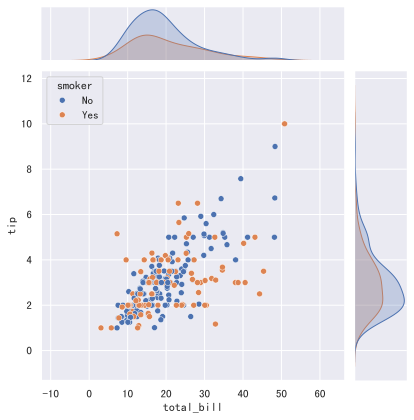

In [56]:
# 绘制联合分布图
sns.jointplot(data=tips_df, x='total_bill', y='tip', hue='smoker')

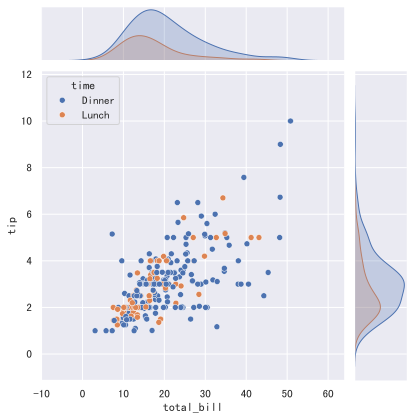

In [57]:
# 绘制联合分布图
sns.jointplot(data=tips_df, x='total_bill', y='tip', hue='time')

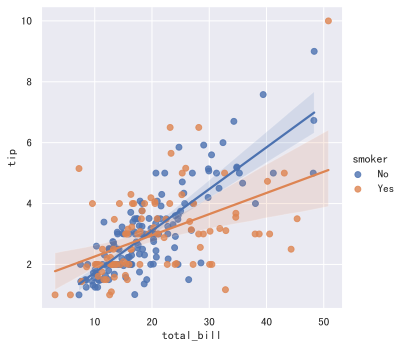

In [58]:
# 绘制线性回归模型图
# lm - linear regression model
sns.lmplot(data=tips_df, x='total_bill', y='tip', hue='smoker')

<Axes: xlabel='day', ylabel='total_bill'>

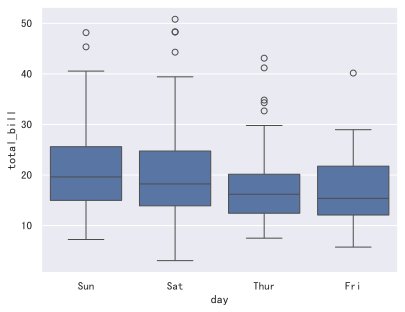

In [59]:
# 绘制箱线图
sns.boxplot(data=tips_df, x='day', y='total_bill')

<Axes: xlabel='day', ylabel='total_bill'>

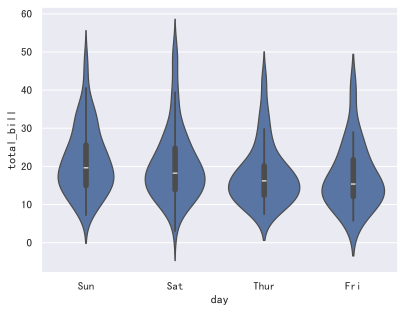

In [60]:
# 绘制小提琴图
sns.violinplot(data=tips_df, x='day', y='total_bill')

### pyecharts

对Apache的echarts库用Python语言进行了封装，可以绘制美观且交互性极佳的统计图表。

In [61]:
# %pip install -U pyecharts

In [62]:
# 配置Notebook的类型是JupyterLab
from pyecharts.globals import CurrentConfig, NotebookType

CurrentConfig.NOTEBOOK_TYPE = NotebookType.JUPYTER_LAB

In [63]:
from pyecharts.charts import Bar

a = np.random.randint(10, 50, 6)
b = np.random.randint(20, 40, 6)

bar = Bar()
bar.add_xaxis(["衬衫", "羊毛衫", "雪纺衫", "裤子", "高跟鞋", "袜子"])
bar.add_yaxis("商家A", a.tolist())
bar.add_yaxis("商家B", b.tolist())
bar.load_javascript()

In [64]:
bar.render_notebook()

In [65]:
from pyecharts.charts import Bar
from pyecharts import options as opts
from pyecharts.globals import ThemeType

# 创建柱状图对象
bar = Bar(init_opts=opts.InitOpts(width='640px', height='480px', theme=ThemeType.LIGHT))
# 修改全局配置项
bar.set_global_opts(
    # 定制标题
    title_opts=opts.TitleOpts(
        title='2022年各品类销售额',
        title_link='http://www.qfedu.com',
        pos_left='center'
    ),
    # 定制图例
    legend_opts=opts.LegendOpts(
        is_show=True,
        pos_top='bottom'
    ),
    # 定制工具箱
    toolbox_opts=opts.ToolboxOpts(
        is_show=True,
        pos_left='right',
        pos_top='center',
        orient='vertical'
    )
)
# 添加横轴的数据
bar.add_xaxis(["衬衫", "羊毛衫", "雪纺衫", "裤子", "高跟鞋", "袜子"])
# 添加纵轴的数据
bar.add_yaxis("商家A", [5, 20, 36, 10, 45, 20])
bar.add_yaxis("商家B", [15, 22, 23, 18, 37, 40])
# 让浏览器加载JS文件
bar.load_javascript()

In [66]:
# 渲染图表
bar.render_notebook()

In [67]:
from pyecharts import options as opts
from pyecharts.charts import Funnel

steps = ['曝光', '点击', '加购', '下单', '支付']
vdata = [10000, 5000, 2000, 1200, 880]

f = Funnel()
f.add('转化', [(step, data) for step, data in zip(steps, vdata)])
f.set_global_opts(
    title_opts=opts.TitleOpts(
        title='转化漏斗',
        pos_left='10%',
        title_textstyle_opts=opts.TextStyleOpts(
            font_family='微软雅黑',
            font_size=28
        )
    )
)
f.load_javascript()

In [68]:
f.render_notebook()

In [69]:
# 注意：pyecharts库只接受原生Python数据类型（不支持numpy的数组，pandas的Series或DataFrame）
import pyecharts.options as opts
from pyecharts.charts import Pie

x_data = ["直接访问", "邮件营销", "联盟广告", "视频广告", "搜索引擎"]
y_data = [335, 310, 234, 135, 1548]

pie_chart = Pie(init_opts=opts.InitOpts(
    width='640px',
    height='480px'
))
pie_chart.add(
    series_name="访问来源",
    data_pair=[list(z) for z in zip(x_data, y_data)],
    radius=["50%", "70%"],
    label_opts=opts.LabelOpts(is_show=False, position="center"),
)
pie_chart.set_global_opts(legend_opts=opts.LegendOpts(pos_left="legft", orient="vertical"))
pie_chart.set_series_opts(
    label_opts=opts.LabelOpts(formatter="{b}: {d}%")
)
pie_chart.load_javascript()

In [70]:
pie_chart.render_notebook()

In [71]:
baidu = pd.read_excel('res/2022年股票数据.xlsx', sheet_name='BIDU', index_col='Date')
baidu = baidu[::-1][['Open', 'Close', 'Low', 'High']].round(2)
baidu

,Open,Close,Low,High
Date,,,,
2022-01-03,148.91,149.10,144.95,149.96
2022-01-04,148.14,146.53,143.56,148.43
2022-01-05,143.82,143.88,142.95,150.26
2022-01-06,146.20,150.75,144.41,153.00
2022-01-07,152.98,153.33,152.28,157.00
...,...,...,...,...
2022-12-23,113.88,111.61,111.52,114.25
2022-12-27,113.10,116.48,112.48,117.50
2022-12-28,114.09,111.60,109.88,115.53


In [72]:
from pyecharts import options as opts
from pyecharts.charts import Kline

x_data = baidu.index.strftime('%m月%d日').values.tolist()
y_data = baidu.values.tolist()

kline_chart = Kline()
kline_chart.add_xaxis(x_data)
kline_chart.add_yaxis('', y_data)
kline_chart.set_global_opts(
    xaxis_opts=opts.AxisOpts(is_scale=True),
    yaxis_opts=opts.AxisOpts(
        is_scale=True,
        splitarea_opts=opts.SplitAreaOpts(
            is_show=True,
            areastyle_opts=opts.AreaStyleOpts(opacity=1)
        ),
    ),
    datazoom_opts=[
        opts.DataZoomOpts(
            pos_bottom='2%',
            range_start=40,
            range_end=60,
        )
    ],
)
kline_chart.load_javascript()

In [73]:
kline_chart.render_notebook()

In [74]:
# 安装地图数据
# %pip uninstall -y echarts-countries-pypkg
# %pip uninstall -y echarts-china-provinces-pypkg
# %pip uninstall -y echarts-china-cities-pypkg
# %pip uninstall -y echarts-china-counties-pypkg

In [75]:
from pyecharts import options as opts
from pyecharts.charts import Map

data = [
    ('广东省', 594), ('浙江省', 438), ('四川省', 316), ('北京市', 269), ('山东省', 248),
    ('江苏省', 234), ('湖南省', 196), ('福建省', 166), ('河南省', 153), ('辽宁省', 152),
    ('上海市', 138), ('河北省', 86), ('安徽省', 79), ('湖北省', 75), ('黑龙江省', 70), 
    ('陕西省', 63), ('吉林省', 59), ('江西省', 56), ('重庆市', 46), ('贵州省', 39),
    ('山西省', 37), ('云南省', 33), ('广西壮族自治区', 28), ('天津市', 22), ('新疆维吾尔自治区', 24),
    ('海南省', 18), ('台湾省', 11), ('甘肃省', 7), ('青海省', 3), ('内蒙古自治区', 17), 
    ('宁夏回族自治区', 1), ('西藏自治区', 1), ('香港特别行政区', 12), ('澳门特别行政区', 2)
]

map_chart = Map(init_opts=opts.InitOpts(width='1000px', height='1000px'))
map_chart.add('', data, 'china', is_roam=False)
map_chart.load_javascript()

In [76]:
map_chart.render_notebook()